In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

## Prepare Data

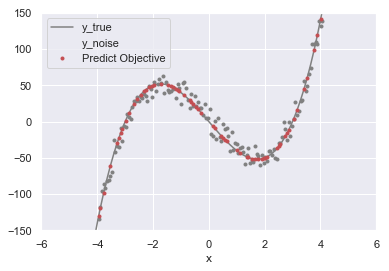

In [2]:
size_d = 200 # sample size
x = np.linspace(-6, 6, size_d)
def obs_process(x):
    return 5*(x+3)*x*(x-3)
y_true = obs_process(x)
np.random.seed(0)
y_noise = y_true + np.random.randn(size_d) * 10.0

size_p = 100
new_x = np.random.permutation(x)[:size_p]
new_x.sort()
new_y_true = obs_process(new_x)

fig, ax = plt.subplots()
pd.DataFrame(
    {'x': x,
     'y_true': y_true}).plot(x='x', ax=ax, style='-', color='gray')
pd.DataFrame(
    {'x': x,
     'y_noise': y_noise}).plot(x='x', ax=ax, style='.', color='gray')
pd.DataFrame(
    {'x': new_x,
     'Predict Objective': new_y_true}).plot(x='x', ax=ax, style='.', color='r')

plt.xlim([-6,6])
plt.ylim([-150,150])
plt.show()

## Kernel regression with sampled teacher data

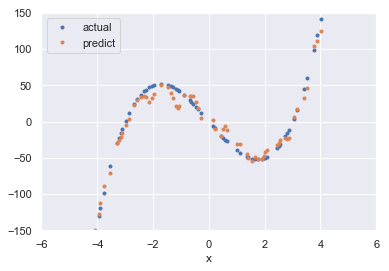

In [5]:
sample_size = 80  # Size of data to be used in learning.
beta = 20.0  # Kernel parameter
theta = 0.1  # Regularize parameter

# Gaussian Kernel
def kernel(x1, x2, beta=beta):
    return np.exp(- beta * (x1 - x2)**2)

df = pd.DataFrame(
    {'x': x,
     'y_noise': y_noise}).sample(sample_size)
selected_x = df['x'].values
selected_y = df['y_noise'].values

# Gram matrix.
K = np.zeros((sample_size, sample_size))
for i in range(sample_size):
    for j in range(sample_size):
        K[i,j] = kernel(selected_x[i], selected_x[j])
        
# Compute psuede inverse matrix of the gram matrix.
K_pinv = np.linalg.pinv(K + theta*np.identity(sample_size))

# Compute weight of learned model of each data point.
alpha = selected_y*K_pinv

# Prediction
y_predict = np.zeros(size_p)
for i in range(size_p):
    for j in range(sample_size):
        w_x = kernel(new_x[i], selected_x)  # Weight of new data of each data point.
        y_predict[i] += (alpha[:, j]@w_x)

# Plot the result.
pd.DataFrame(
    {'x': new_x,
     'actual': new_y_true,
     'predict': y_predict}).plot(x='x', style='.')

plt.xlim([-6,6])
plt.ylim([-150,150])
plt.show()